In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install umap-learn
!pip install hdbscan
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=ecb65f41fc6788060cf06ffce7773d285d57ca02c15de8d18358c4191ac8b273
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=d93056b093aeae85e4f75b1084a2bfce35bd6667a6419bcbecf210d863a7c34f
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from string import punctuation
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
import re
from nltk.stem.porter import *
import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
file_name_1 = "gdrive/My Drive/SBERT/23rd_May/full_embeddings_tweets.csv"
data = pd.read_csv(file_name_1)
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col377,col378,col379,col380,col381,col382,col383,col384,tweet,sentiment
0,-0.014565,0.060111,0.119454,-0.047384,0.093133,-0.072652,0.052771,0.002597,0.058221,-0.003416,...,-0.019085,0.079287,-0.011097,0.042537,0.045679,0.021283,0.008058,0.017605,I officially hate my life today and the one pe...,0
1,0.011030,0.034477,0.068573,0.002581,0.010340,-0.047709,0.010674,0.000246,-0.009554,-0.009581,...,-0.013863,-0.086579,-0.074525,0.006034,0.055888,0.052725,-0.059188,-0.061896,Cleaned my room a little to please my mom,1
2,0.015960,-0.052574,0.018497,0.018892,-0.006655,0.071140,-0.029289,-0.010650,-0.009254,-0.059725,...,-0.016072,-0.109034,-0.054823,0.068031,0.028173,-0.035924,0.003371,-0.009345,Does anyone know where (in NYC) I can buy Frui...,0
3,-0.003558,-0.099517,0.015291,0.053898,0.158180,-0.021613,0.097630,-0.014375,-0.059783,-0.061025,...,-0.052516,-0.045734,-0.020316,0.009157,0.057912,-0.074156,-0.056944,-0.105576,and I'm off to boot camp,0
4,-0.027612,-0.068194,0.077334,-0.048003,0.019429,-0.044327,0.017568,0.025351,0.076214,0.031570,...,0.097603,-0.058197,0.050015,-0.033681,0.045457,-0.082604,-0.064124,0.043586,@xiaorulez ye twitter doesnt really work here ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,0.029363,0.047914,0.023436,0.002305,-0.042702,0.033576,0.054522,-0.094529,-0.086696,-0.021209,...,0.027544,-0.044772,0.083984,-0.023848,0.064624,0.015816,-0.064469,-0.005990,tasks around the house then some shopping in h...,1
31996,0.040156,0.015773,0.019859,-0.008730,-0.000048,-0.020695,-0.060060,-0.069958,-0.067900,-0.003435,...,-0.007524,-0.017965,-0.089766,0.049717,0.054706,0.028655,-0.095847,0.067497,Wow was awesome with the americans over. Not l...,0
31997,-0.044829,0.011103,-0.024794,0.020231,0.191299,-0.040002,0.021474,-0.031828,0.054785,0.008779,...,0.112970,-0.012965,0.000386,0.070072,0.120493,-0.004978,0.022437,-0.017028,@ResourcefulMom I had a problem while trying t...,0
31998,0.004315,0.008201,-0.024524,-0.056011,0.039452,-0.055764,-0.016375,0.043474,-0.026245,-0.022829,...,-0.014158,0.004409,-0.007261,-0.000583,0.056978,-0.034139,-0.088852,-0.006109,@jerry_cohen Just floor it! You should be fine.,1


In [ ]:
# data_train = data.sample(frac=0.75)
# data_test = data.drop(data_train.index)

In [ ]:
import umap
X,y = data.drop(columns=['tweet','sentiment'],axis=1),data['sentiment']
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=10, 
                            metric='cosine').fit_transform(X)

In [ ]:

import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=300,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [ ]:
unique_labels = np.unique(cluster.labels_,axis=0)
len(unique_labels)

9

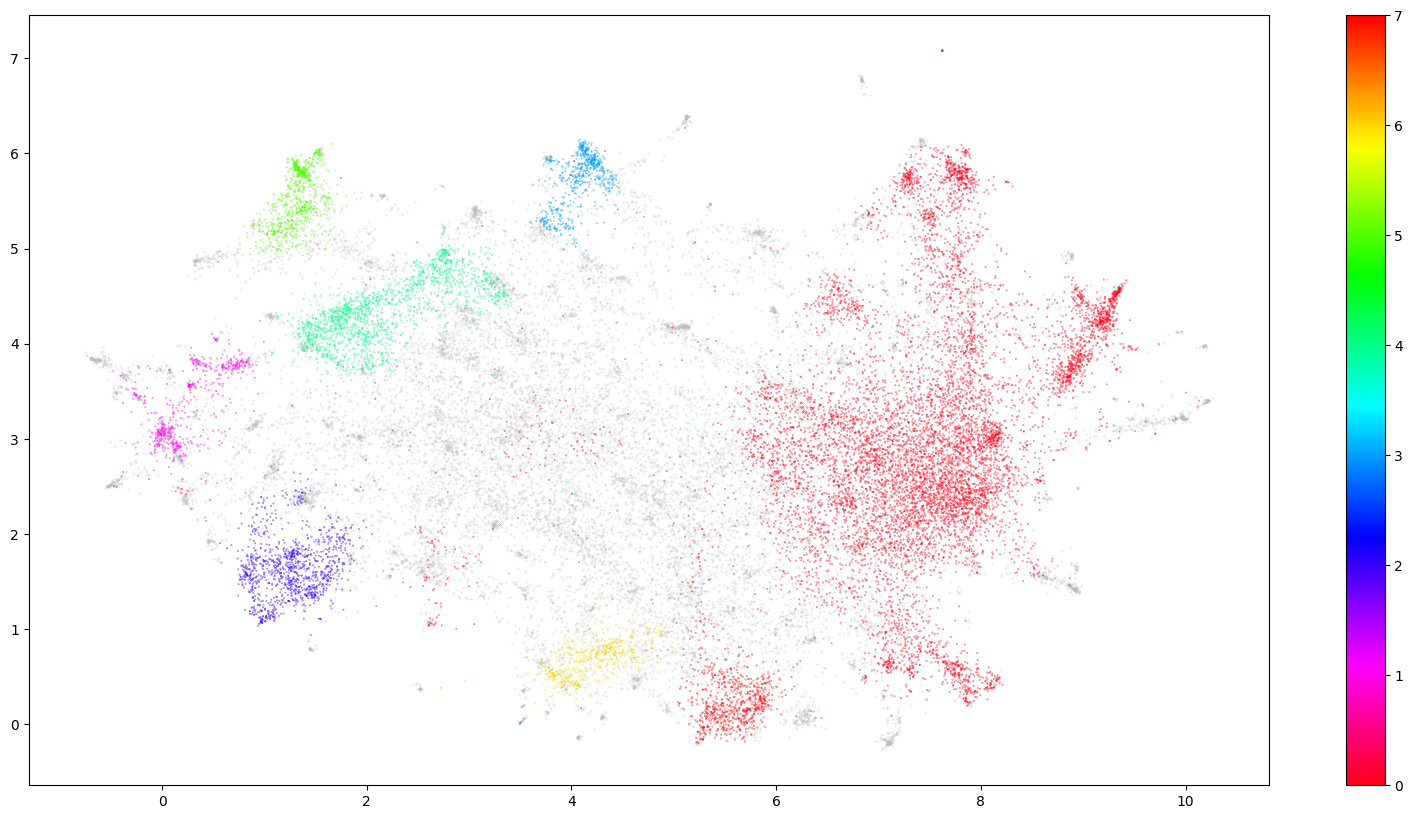

In [ ]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(X)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
# Prepare data, extract embeddings, and prepare sub-models
docs = data['tweet'].tolist()
cluster = hdbscan.HDBSCAN(min_cluster_size=300,
                          metric='euclidean',                      
                          cluster_selection_method='eom',prediction_data=True)
umap_model = umap.UMAP(n_neighbors=15, n_components=10, min_dist=0.0, metric='cosine', random_state=42)
vectorizer_model = CountVectorizer(ngram_range=(1, 3),stop_words="english")
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = np.array(X)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
# We reduce our embeddings to 2D as it will allows us to quickly iterate later on

# Train our topic model
topic_model = BERTopic(hdbscan_model=cluster,embedding_model=sentence_model, umap_model=umap_model, 
                       vectorizer_model=vectorizer_model,calculate_probabilities=True,ctfidf_model=ctfidf_model, nr_topics='auto',verbose=True)
topics, probs = topic_model.fit_transform(docs, embeddings)

2023-05-23 12:04:29,005 - BERTopic - Reduced dimensionality
2023-05-23 12:04:46,097 - BERTopic - Clustered reduced embeddings
2023-05-23 12:04:54,067 - BERTopic - Reduced number of topics from 13 to 13


### c-TF-IDF representation of the topics in 2D using Umap and then visualize the two dimensions using plotly such that we can create an interactive view.

In [ ]:
topic_model.visualize_topics()

### Using the previous method, we can visualize the topics and get insight into their relationships. However, you might want a more fine-grained approach where we can visualize the documents inside the topics to see if they were assigned correctly or whether they make sense. To do so, we can use the topic_model.visualize_documents() function. This function recalculates the document embeddings and reduces them to 2-dimensional space for easier visualization purposes

In [ ]:
reduced_embeddings = umap.UMAP(n_neighbors=15, n_components=2, 
                          min_dist=0.0, metric='cosine').fit_transform(embeddings)

topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings, 
                                hide_document_hover=True, hide_annotations=True)

In [ ]:
topic_model.visualize_barchart()

The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. This might help to select an appropriate nr_topics when reducing the number of topics that you have created.

When tweaking your topic model, the number of topics that are generated has a large effect on the quality of the topic representations. Some topics could be merged and having an understanding of the effect will help you understand which topics should and which should not be merged.

That is where hierarchical topic modeling comes in. It tries to model the possible hierarchical nature of the topics you have created to understand which topics are similar to each other. Moreover, you will have more insight into sub-topics that might exist in your data.

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 11/11 [00:00<00:00, 32.39it/s]


In [ ]:
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

.
├─sleep_work_day_bed_today
│    ├─■──miss_missing_sad_misses_life ── Topic: 10
│    └─sleep_work_bed_rain_day
│         ├─sleep_work_rain_bed_day
│         │    ├─sleep_work_rain_bed_day
│         │    │    ├─■──rain_weather_sun_raining_sunny ── Topic: 4
│         │    │    └─sleep_work_bed_tired_tomorrow
│         │    │         ├─■──sleep_work_bed_tired_night ── Topic: 1
│         │    │         └─■──exam_school_exams_study_studying ── Topic: 6
│         │    └─■──sick_hurts_throat_sore_flu ── Topic: 8
│         └─■──eat_food_hungry_lunch_eating ── Topic: 2
└─twitter_thanks_tweet_quot_song
     ├─twitter_thanks_tweet_song_quot
     │    ├─song_watching_movie_music_watch
     │    │    ├─■──watching_movie_watch_season_twilight ── Topic: 9
     │    │    └─■──song_music_listening_album_songs ── Topic: 5
     │    └─twitter_thanks_tweet_iphone_phone
     │         ├─twitter_thanks_tweet_lol_tweets
     │         │    ├─■──thanks_sorry_lol_thank_know ── Topic: 0
     │         │    └─■

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
classes = np.array(data['sentiment'])
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

2it [00:03,  1.59s/it]


In [ ]:
# To visualize the probabilities of topic assignment
topic_model.visualize_distribution(probs[1])


In [ ]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(docs[0], topic_token_distr[0])
df

100%|██████████| 32/32 [00:07<00:00,  4.23it/s]


,officially,hate,my,life,today,and,the,one,person,that,could,cheer,my,up,doesn,seem,to,care


# Modelling

In [ ]:
labels = cluster.labels_
print(labels)

[ 8 -1  0 ...  2  7 -1]


In [ ]:
unique_labels = np.unique(cluster.labels_,axis=0)

In [ ]:
print("no of clusters:",len(unique_labels))

no of clusters: 13


In [ ]:
# test_x,test_y = data_test.drop(columns=['tweet','sentiment'],axis=1),data_test['sentiment']
# test_x = np.array(test_x)
# test_embeddings = umap.UMAP(n_neighbors=15, 
#                             n_components=5, 
#                             metric='cosine').fit_transform(test_x)
# test_labels, strengths = hdbscan.approximate_predict(cluster, test_embeddings)
# test_labels

In [ ]:
from collections import defaultdict
clusturing_models = defaultdict(list)
clustering_x = defaultdict(list)
clustering_y = defaultdict(list)

for i in range(len(data)):
  l,u = labels[i],umap_embeddings[i]
  clustering_x[l].append(u)
  clustering_y[l].append(data.sentiment.tolist()[i])


In [ ]:
cluster_info = []
for i in clustering_x.keys():
  cluster_info.append([i,len(clustering_x[i])])
cluster_info = pd.DataFrame(cluster_info,columns=['cluster_name','sample_size'])
cluster_info

,cluster_name,sample_size
0,8,477
1,-1,18059
2,0,1364
3,5,1046
4,11,901
5,3,856
6,4,1969
7,10,725
8,9,936
9,1,785


In [ ]:
#original_model downsample
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X,y = data.drop(columns=['tweet','sentiment'],axis=1),data['sentiment']
# umap_embeddings = umap.UMAP(n_neighbors=100, 
#                             n_components=20, 
#                             metric='cosine').fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(umap_embeddings, y, test_size=0.2, random_state=42)
original_clf = LogisticRegression(random_state=0,max_iter=500).fit(train_x,train_y)
y_train = original_clf.predict(train_x)
target_names = ['negative', 'positive']
# print('training report for cluster {}'.format(n_cluster))
# print(classification_report(train_y, y_train, target_names=target_names))
target_names = ['negative', 'positive']
y_pred = original_clf.predict(test_x)
print('auc-roc score',roc_auc_score(test_y, original_clf.predict_proba(test_x)[:, 1]))
print(classification_report(test_y, y_pred, target_names=target_names))

auc-roc score 0.6990480753352224
              precision    recall  f1-score   support

    negative       0.65      0.62      0.63      3197
    positive       0.64      0.67      0.65      3203

    accuracy                           0.64      6400
   macro avg       0.64      0.64      0.64      6400
weighted avg       0.64      0.64      0.64      6400



In [ ]:

results = []

for n_cluster in clustering_x.keys():
  new_X= np.array(clustering_x[n_cluster])
  
  new_y = np.array(clustering_y[n_cluster]).reshape(-1,1)
  
  train_x,test_x,train_y,test_y = train_test_split(new_X, new_y, test_size=0.2, random_state=42)
  print(train_x.shape)
  print(train_y.shape)
  clf = LogisticRegression(random_state=0,max_iter=500).fit(train_x,train_y)
  y_train = clf.predict(train_x)
  target_names = ['negative', 'positive']
  # print('training report for cluster {}'.format(n_cluster))
  # print(classification_report(train_y, y_train, target_names=target_names))
  
  y_pred = clf.predict(test_x)
  test_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])
  test_score_original = roc_auc_score(test_y, original_clf.predict_proba(test_x)[:, 1])
  results.append([test_score_original,test_score,test_score>test_score_original])
  # print('testing report for cluster {}'.format(n_cluster))
  # print(classification_report(test_y, y_pred, target_names=target_names))
results = pd.DataFrame(results,columns=['old_model_score','clustering_model_score','improvement'])
results

(381, 10)
(381, 1)
(14447, 10)
(14447, 1)
(1091, 10)
(1091, 1)
(836, 10)
(836, 1)
(720, 10)
(720, 1)
(684, 10)
(684, 1)
(1575, 10)
(1575, 1)
(580, 10)
(580, 1)
(748, 10)
(748, 1)
(628, 10)
(628, 1)
(3001, 10)
(3001, 1)
(661, 10)
(661, 1)
(242, 10)
(242, 1)


,old_model_score,clustering_model_score,improvement
0,0.725079,0.674286,False
1,0.661227,0.660903,False
2,0.607666,0.590978,False
3,0.719704,0.661136,False
4,0.578157,0.582531,True
5,0.588054,0.659021,True
6,0.688333,0.693675,True
7,0.504589,0.600125,True
8,0.725192,0.720708,False
9,0.549319,0.508761,False


### Keep same sample size

In [ ]:
from collections import defaultdict
clusturing_models = defaultdict(list)
clustering_x = defaultdict(list)
clustering_y = defaultdict(list)
X = np.array(X)
for i in range(len(data)):
  l,u = labels[i],X[i]
  clustering_x[l].append(u)
  clustering_y[l].append(data.sentiment.tolist()[i])

In [ ]:
#original_model
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X,y = data.drop(columns=['tweet','sentiment'],axis=1),data['sentiment']

train_x,test_x,train_y,test_y = train_test_split(X, y, test_size=0.2, random_state=42)
original_clf = LogisticRegression(random_state=0,max_iter=500).fit(train_x,train_y)
y_train = original_clf.predict(train_x)
target_names = ['negative', 'positive']
# print('training report for cluster {}'.format(n_cluster))
# print(classification_report(train_y, y_train, target_names=target_names))
target_names = ['negative', 'positive']
y_pred = original_clf.predict(test_x)
print('auc-roc score',roc_auc_score(test_y, original_clf.predict_proba(test_x)[:, 1]))
print(classification_report(test_y, y_pred, target_names=target_names))

auc-roc score 0.8419708083727807
              precision    recall  f1-score   support

    negative       0.77      0.75      0.76      3197
    positive       0.76      0.77      0.76      3203

    accuracy                           0.76      6400
   macro avg       0.76      0.76      0.76      6400
weighted avg       0.76      0.76      0.76      6400



In [ ]:
results = []

for n_cluster in clustering_x.keys():
  new_X= np.array(clustering_x[n_cluster])
  
  new_y = np.array(clustering_y[n_cluster]).reshape(-1,1)
  
  train_x,test_x,train_y,test_y = train_test_split(new_X, new_y, test_size=0.2, random_state=42)
  clf = LogisticRegression(random_state=0,max_iter=500).fit(train_x,train_y)
  y_train = clf.predict(train_x)
  target_names = ['negative', 'positive']
  # print('training report for cluster {}'.format(n_cluster))
  # print(classification_report(train_y, y_train, target_names=target_names))
  
  y_pred = clf.predict(test_x)
  test_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])
  test_score_original = roc_auc_score(test_y, original_clf.predict_proba(test_x)[:, 1])
  results.append([test_score_original,test_score,test_score>test_score_original])
  # print('testing report for cluster {}'.format(n_cluster))
  # print(classification_report(test_y, y_pred, target_names=target_names))
results = pd.DataFrame(results,columns=['old_model_score','clustering_model_score','improvement'])
results

,old_model_score,clustering_model_score,improvement
0,0.836825,0.801270,False
1,0.850858,0.839787,False
2,0.801087,0.799742,False
3,0.805926,0.789531,False
4,0.898659,0.899971,True
5,0.745844,0.777401,True
6,0.804050,0.783147,False
7,0.829161,0.819149,False
8,0.850265,0.822773,False
9,0.908177,0.755354,False
